### In this notebook I began to work on the problem for my project/presentation. I decided to create something that would take in three key features, and output the neighborhoods in order of rank along with their mean price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV

# pd.set_option('max_columns', None)
# pd.set_option('max_rows', None)


Bad key "text.kerning_factor" on line 4 in
/Users/chrisjohnson/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_eda = pd.read_csv('../3 Data_Files/clean_train.csv')
test_eda = pd.read_csv('../3 Data_Files/clean_test.csv')

In [3]:
train_eda.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Exter Qual and Gr Liv Area
0,109,533352170,60,RL,0.0,13517,Pave,0,3,Lvl,...,0,0,0,0,0,3,2010,WD,130500,5916


### In the below section i plotted various features to see which features I wanted to use for the project/presentation example. I ultimately decided on the three features listed below plus Sale Price.

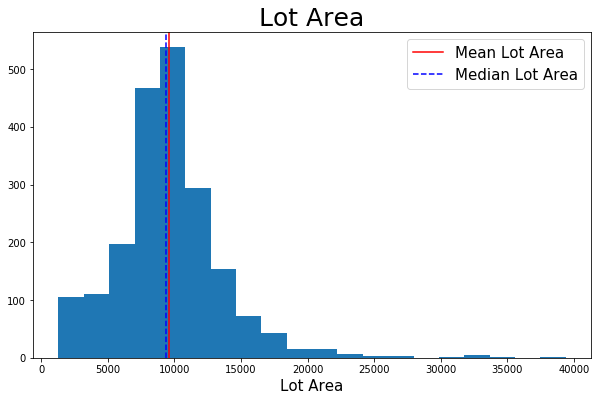

In [4]:
lot_area_mean = train_eda['Lot Area'].mean()
lot_area_median = train_eda['Lot Area'].median()

plt.figure(figsize=(10,6))
plt.hist(train_eda['Lot Area'], bins=20) # feel free to add more settings
plt.title('Lot Area', fontsize=25)
plt.axvline(x=lot_area_mean, c='r',label='Mean Lot Area')
plt.axvline(x=lot_area_median, c='b', linestyle='--',label='Median Lot Area')
plt.legend(fontsize=15)
plt.xlabel('Lot Area', fontsize=15);

In [5]:
print(lot_area_mean)
print(lot_area_median)

9636.329400196657
9373.0


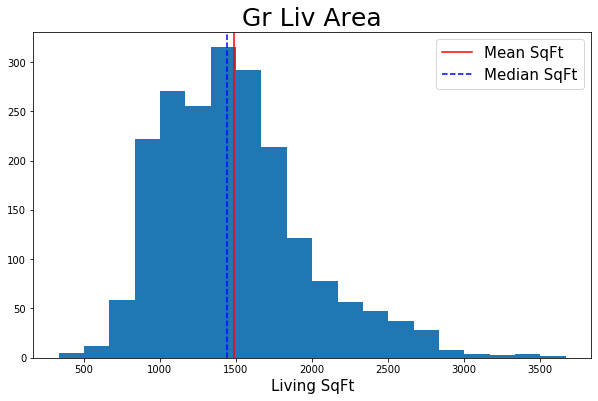

In [6]:
living_area_mean = train_eda['Gr Liv Area'].mean()
living_area_median = train_eda['Gr Liv Area'].median()

plt.figure(figsize=(10,6))
plt.hist(train_eda['Gr Liv Area'], bins=20) # feel free to add more settings
plt.title('Gr Liv Area', fontsize=25)
plt.axvline(x=living_area_mean, c='r',label='Mean SqFt')
plt.axvline(x=living_area_median, c='b', linestyle='--',label='Median SqFt')
plt.legend(fontsize=15)
plt.xlabel('Living SqFt', fontsize=15);

In [7]:
print(living_area_mean)
print(living_area_median)

1491.2792527040315
1441.0


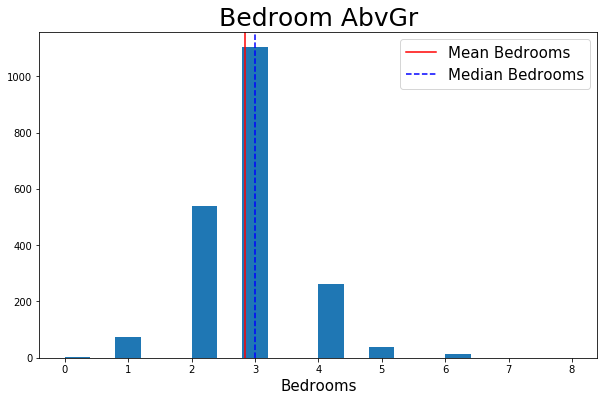

In [8]:
bedroom_mean = train_eda['Bedroom AbvGr'].mean()
bedroom_median = train_eda['Bedroom AbvGr'].median()

plt.figure(figsize=(10,6))
plt.hist(train_eda['Bedroom AbvGr'], bins=20) # feel free to add more settings
plt.title('Bedroom AbvGr', fontsize=25)
plt.axvline(x=bedroom_mean, c='r',label='Mean Bedrooms')
plt.axvline(x=bedroom_median, c='b', linestyle='--',label='Median Bedrooms')
plt.legend(fontsize=15)
plt.xlabel('Bedrooms', fontsize=15);

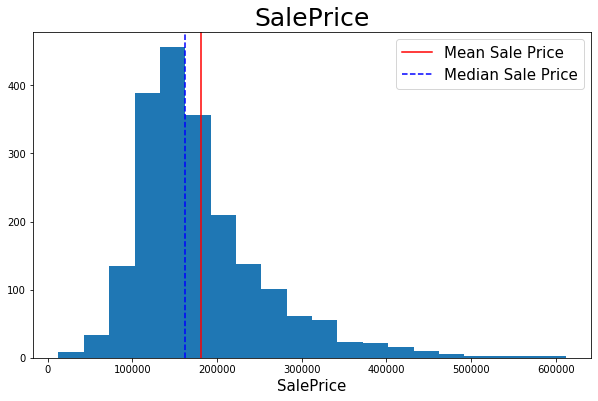

In [9]:
sale_mean = train_eda['SalePrice'].mean()
sale_median = train_eda['SalePrice'].median()

plt.figure(figsize=(10,6))
plt.hist(train_eda['SalePrice'], bins=20) # feel free to add more settings
plt.title('SalePrice', fontsize=25)
plt.axvline(x=sale_mean, c='r',label='Mean Sale Price')
plt.axvline(x=sale_median, c='b', linestyle='--',label='Median Sale Price')
plt.legend(fontsize=15)
plt.xlabel('SalePrice', fontsize=15);

In [10]:
print(sale_mean)
print(sale_median)

180661.48328416914
162000.0


In [11]:
lot_and_sqft = train_eda[(train_eda['Lot Area'] > 1) & (train_eda['Gr Liv Area'] > 1)]


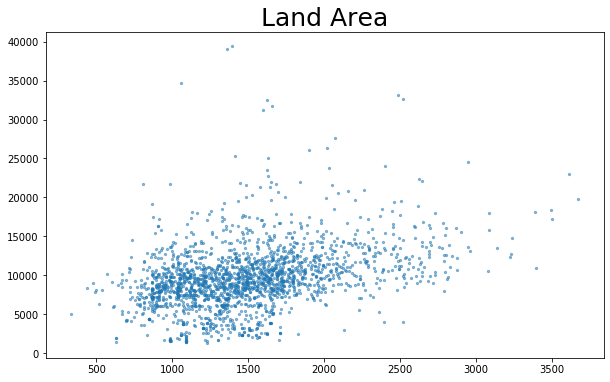

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(train_eda['Gr Liv Area'], train_eda['Lot Area'], s=5, alpha = .5)
plt.title('Land Area', fontsize=25);

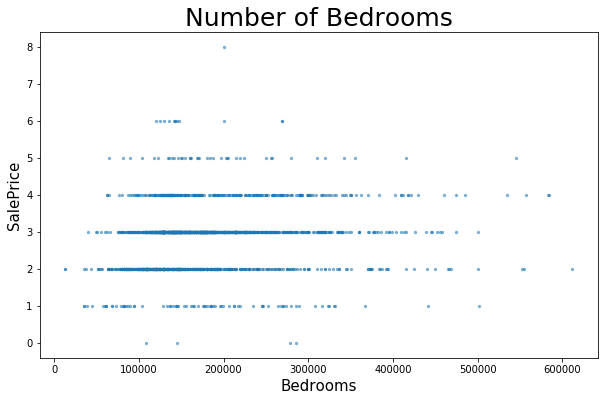

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(train_eda['SalePrice'], train_eda['Bedroom AbvGr'], s=5, alpha = .5)
plt.title('Number of Bedrooms', fontsize=25)
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Bedrooms', fontsize=15);

In [14]:
#Dummify the neighborhood column.
train_eda = pd.get_dummies(train_eda, columns=['Neighborhood'])

### Created a function that would output a readable version of all of the unique values and value counts for each column.

In [15]:
def columns_values(dataframe):
    for n in dataframe.columns:                               # cycle through the columns in dataframe
        column = n  
        value_counts = (dataframe[column].value_counts())     # run value counts for each column
        unique_values = (dataframe[column].unique())          # run unique values for each column 
        len_counts = len(value_counts)                        # how many items are counted in value counts
        len_unique = len(unique_values)                       # how many items are counted in unique values
        if (len(value_counts)< 100):                          # ignore columns where counts over 100
                print(f"{column} has length of {len_unique}") # print how many unique values there are
                print(unique_values)                          # print unique values for column 
                print("="*30)                                  
                print(f"{column} has length of {len_counts}") # print how many values are counted
                print(value_counts)                           # print unique values counted
                print("="*60)

In [16]:
columns_values(train_eda)

MS SubClass has length of 16
[ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
MS SubClass has length of 16
20     759
60     390
50     197
120    132
30     101
70      90
160     88
80      86
90      75
190     45
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64
MS Zoning has length of 7
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
MS Zoning has length of 7
RL         1581
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
Street has length of 2
['Pave' 'Grvl']
Street has length of 2
Pave    2027
Grvl       7
Name: Street, dtype: int64
Alley has length of 3
['0' 'Pave' 'Grvl']
Alley has length of 3
0       1894
Grvl      85
Pave      55
Name: Alley, dtype: int64
Lot Shape has length of 4
[3 4 2 1]
Lot Shape has length of 4
4    1294
3     682
2      50
1       8
Name: Lot Shape, dtype: int64
Land Contour has length of 4
['Lvl' 'HLS' 'Bnk

Neighborhood_Blmngtn has length of 2
[0 1]
Neighborhood_Blmngtn has length of 2
0    2012
1      22
Name: Neighborhood_Blmngtn, dtype: int64
Neighborhood_Blueste has length of 2
[0 1]
Neighborhood_Blueste has length of 2
0    2028
1       6
Name: Neighborhood_Blueste, dtype: int64
Neighborhood_BrDale has length of 2
[0 1]
Neighborhood_BrDale has length of 2
0    2015
1      19
Name: Neighborhood_BrDale, dtype: int64
Neighborhood_BrkSide has length of 2
[0 1]
Neighborhood_BrkSide has length of 2
0    1958
1      76
Name: Neighborhood_BrkSide, dtype: int64
Neighborhood_ClearCr has length of 2
[0 1]
Neighborhood_ClearCr has length of 2
0    2012
1      22
Name: Neighborhood_ClearCr, dtype: int64
Neighborhood_CollgCr has length of 2
[0 1]
Neighborhood_CollgCr has length of 2
0    1854
1     180
Name: Neighborhood_CollgCr, dtype: int64
Neighborhood_Crawfor has length of 2
[0 1]
Neighborhood_Crawfor has length of 2
0    1963
1      71
Name: Neighborhood_Crawfor, dtype: int64
Neighborhood_Edw

In [17]:
# Decided to drop the Landmark Neighborhood simply because it was the smallest set
train_eda.drop(['Neighborhood_Landmrk'], axis=1, inplace=True)

In [18]:
# For the purposes of this project/presentation I made a smaller dataframe to work with
neighborhood_glance = train_eda[['SalePrice', 'Lot Area', 'Year Built', 'Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker']]

In [19]:
# Create a dictionary to use to rename the neighborhood columns, and also use in functions
neighborhood_names = {'Neighborhood_Blmngtn':'Bloomington',
'Neighborhood_Blueste': 'Bluestem',
'Neighborhood_BrDale': 'Briardale',
'Neighborhood_BrkSide': 'Brookside',
'Neighborhood_ClearCr': 'Clear Creek',
'Neighborhood_CollgCr': 'College Creek',
'Neighborhood_Crawfor': 'Crawford',
'Neighborhood_Edwards': 'Edwards',
'Neighborhood_Gilbert': 'Gilbert',
'Neighborhood_Greens': 'Greens',
'Neighborhood_GrnHill': 'Green Hills',
'Neighborhood_IDOTRR': 'IDOTRR',
'Neighborhood_MeadowV': 'Meadow Village',
'Neighborhood_Mitchel': 'Mitchell',
'Neighborhood_NAmes': 'North Ames',
'Neighborhood_NPkVill': 'Northridge',
'Neighborhood_NWAmes': 'Northpark Villa',
'Neighborhood_NoRidge': 'Northridge Heights',
'Neighborhood_NridgHt': 'Northwest Ames',
'Neighborhood_OldTown': 'Old Town',
'Neighborhood_SWISU': 'SWISU',
'Neighborhood_Sawyer': 'Sawyer',
'Neighborhood_SawyerW': 'Sawyer West',
'Neighborhood_Somerst': 'Somerset',
'Neighborhood_StoneBr': 'Stone Brook',
'Neighborhood_Timber': 'Timberland',
'Neighborhood_Veenker': 'Veenker'}

In [20]:
#Rename columns in new dataframe
neighborhood_glance.rename(columns=neighborhood_names, inplace=True)

/Users/chrisjohnson/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Comparison of Key Features by Neighborhood

### Created a function here to create a dictionary of the means of each fature by neighborhood, and then output a chart to represent the information.

In [21]:

def chart_mean(dataframe1, dataframe2, categorylist, item, column):
    item_mean = {}     # create an empty dictionary
    for column in dataframe1.columns:    # cycle through columns in dataframe
        for key, neighborhood in categorylist.items():   # pull keys and values from neighborhood dictionary
            if column in categorylist[key]:    # is the column in the values of the dictionary
                # below create create key, value pair with column and mean of target item
                item_mean[column] = round(dataframe1[(dataframe1[column]==1)][item].mean(), 2)
    item_mean = sorted(item_mean.items(), key=lambda x: x[1]) #sorted for increasing value
    item_names = [] # create empty list for names to use in plot
    item_values = [] # create empty list for names to use in plot
    for i in item_mean: # cycling through item_mean dictionary
        item_names.append(i[0]) # add the dictionary key to the item_names 
        item_values.append(i[1]) # add the dictionary key to the item_names  
    total_item_mean = dataframe2[item].mean() # set mean using the original dataframe
    # create plot
    plt.figure(figsize=(30,15))
    plt.bar(item_names, item_values)
    plt.xticks(rotation=90, fontsize=25)
    plt.yticks(fontsize=25)
    plt.axhline(y=total_item_mean, c='r',label=f'Mean {item}')
    plt.legend(fontsize=35, loc='upper left')
    plt.title(f'{item} by Neighborhood', fontsize=50)
    plt.xlabel('Neighborhood');

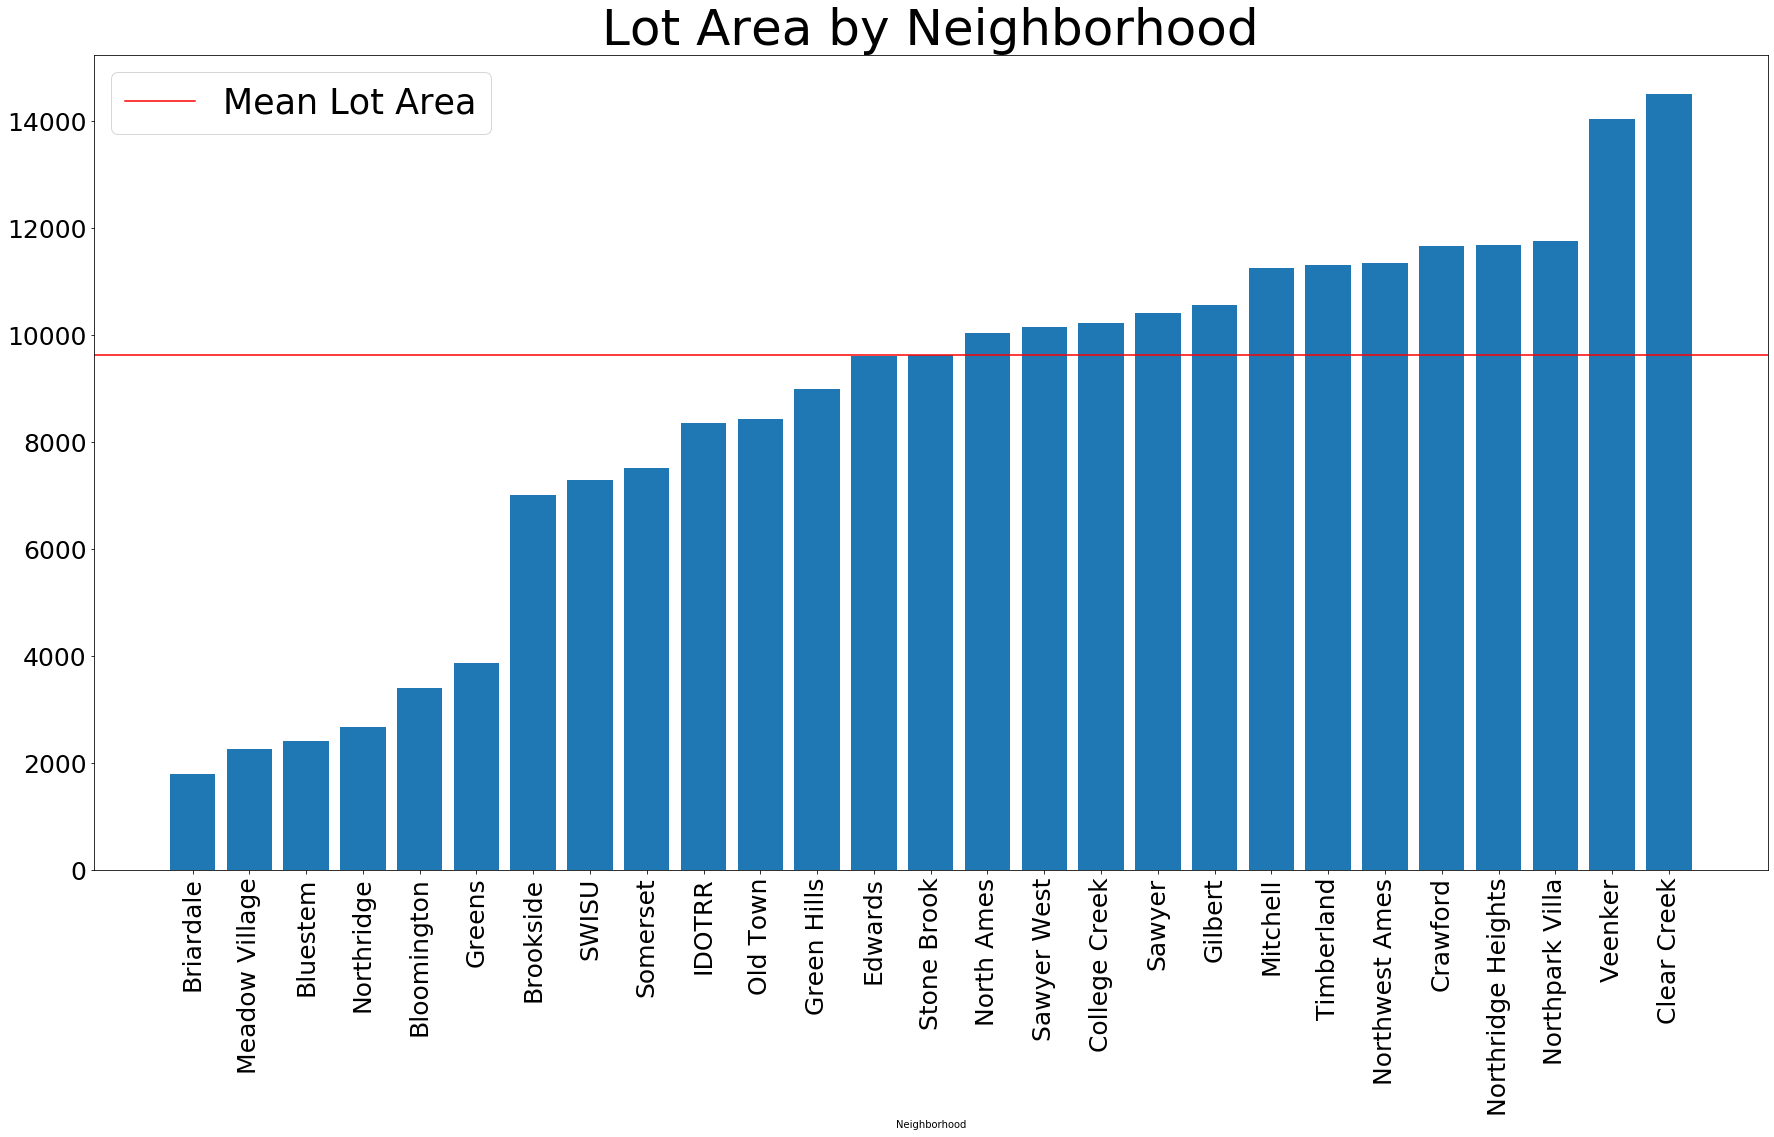

In [22]:
chart_mean(neighborhood_glance, train_eda, neighborhood_names, 'Lot Area', 'Lot Area')

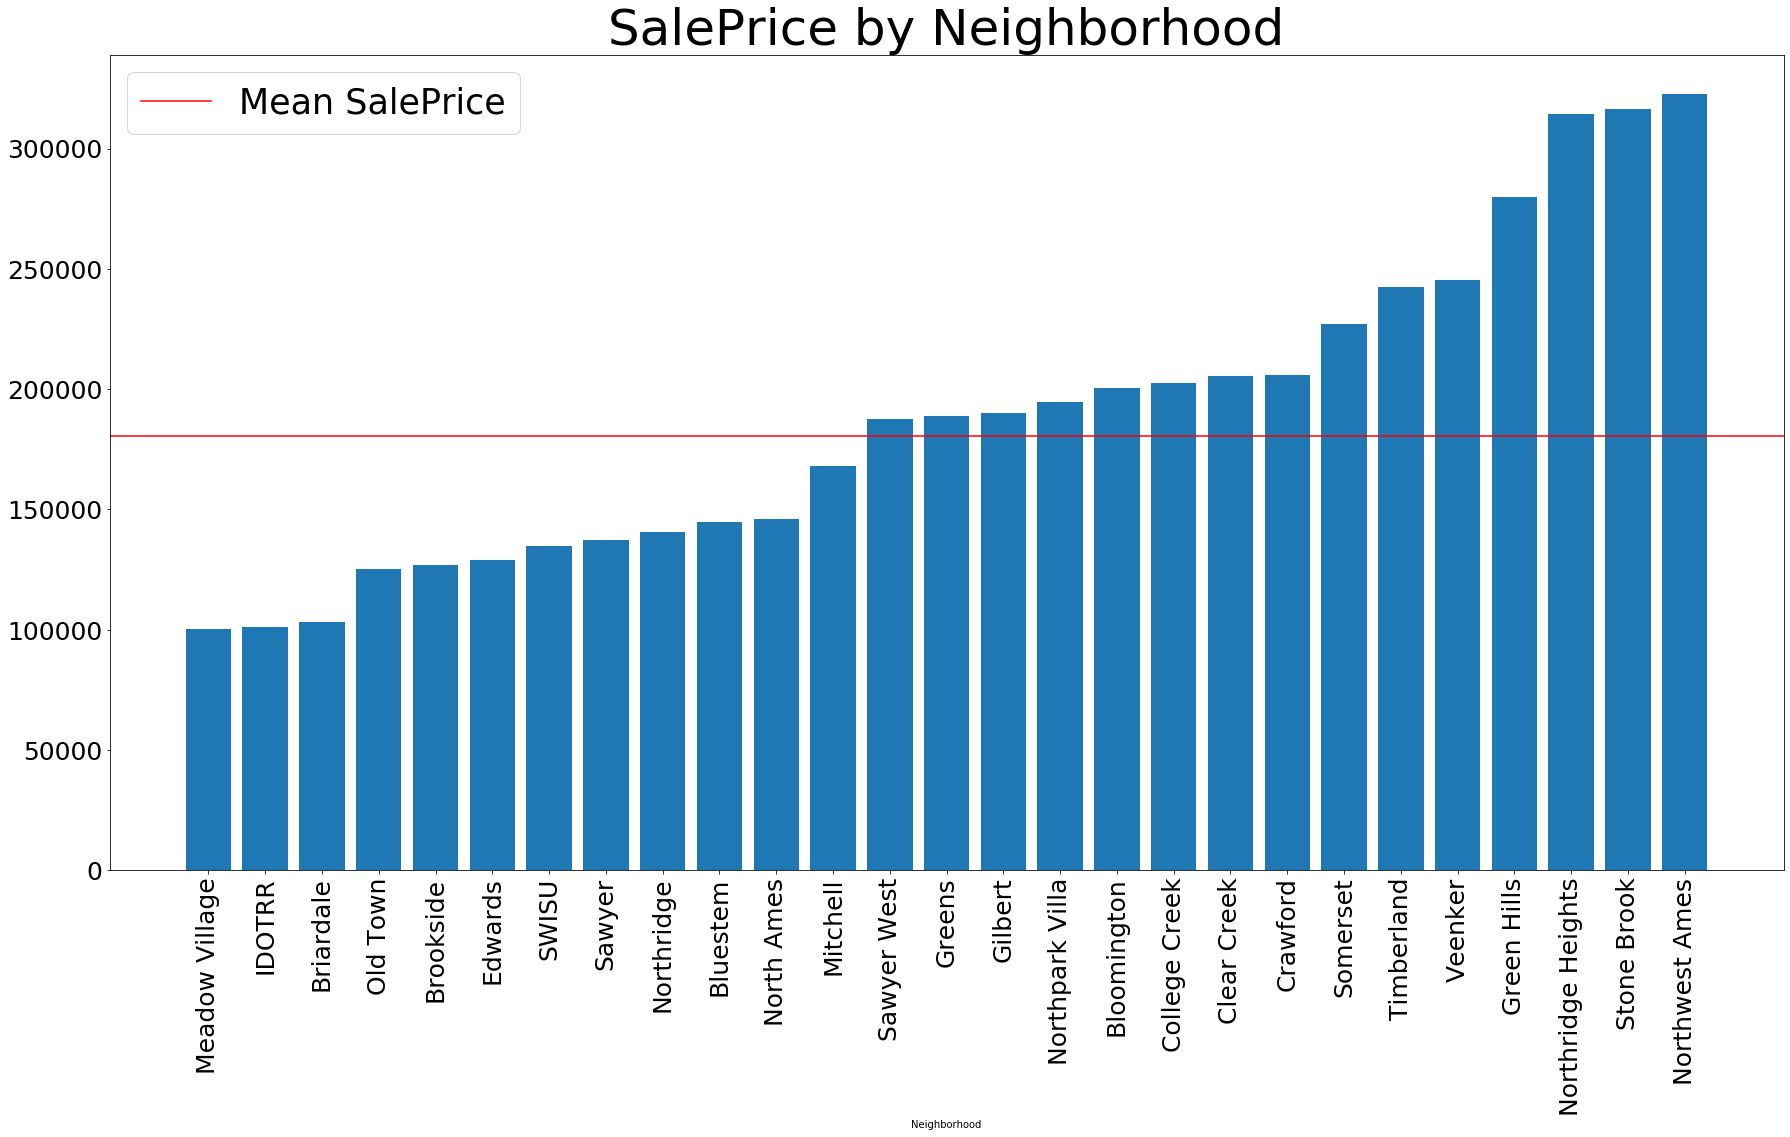

In [23]:
chart_mean(neighborhood_glance, train_eda, neighborhood_names, 'SalePrice', 'SalePrice')

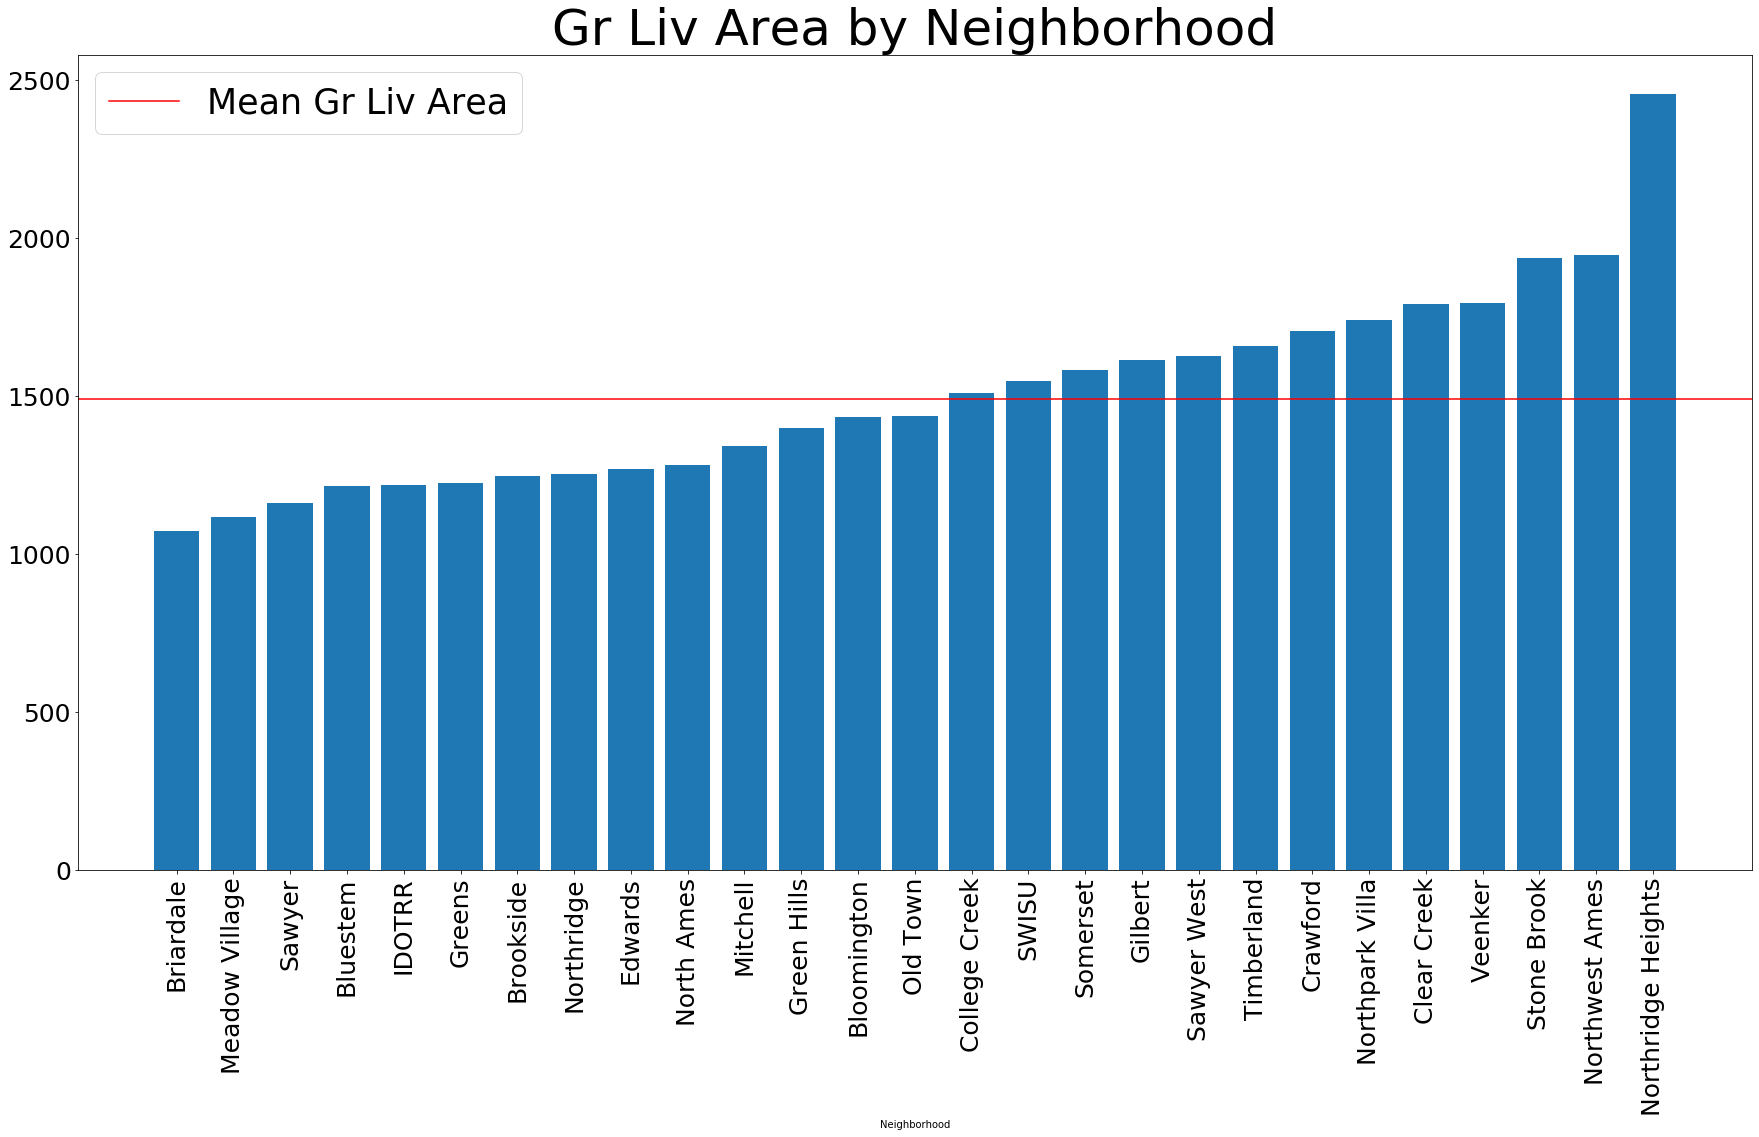

In [24]:
chart_mean(neighborhood_glance, train_eda, neighborhood_names, 'Gr Liv Area', 'Living Area')

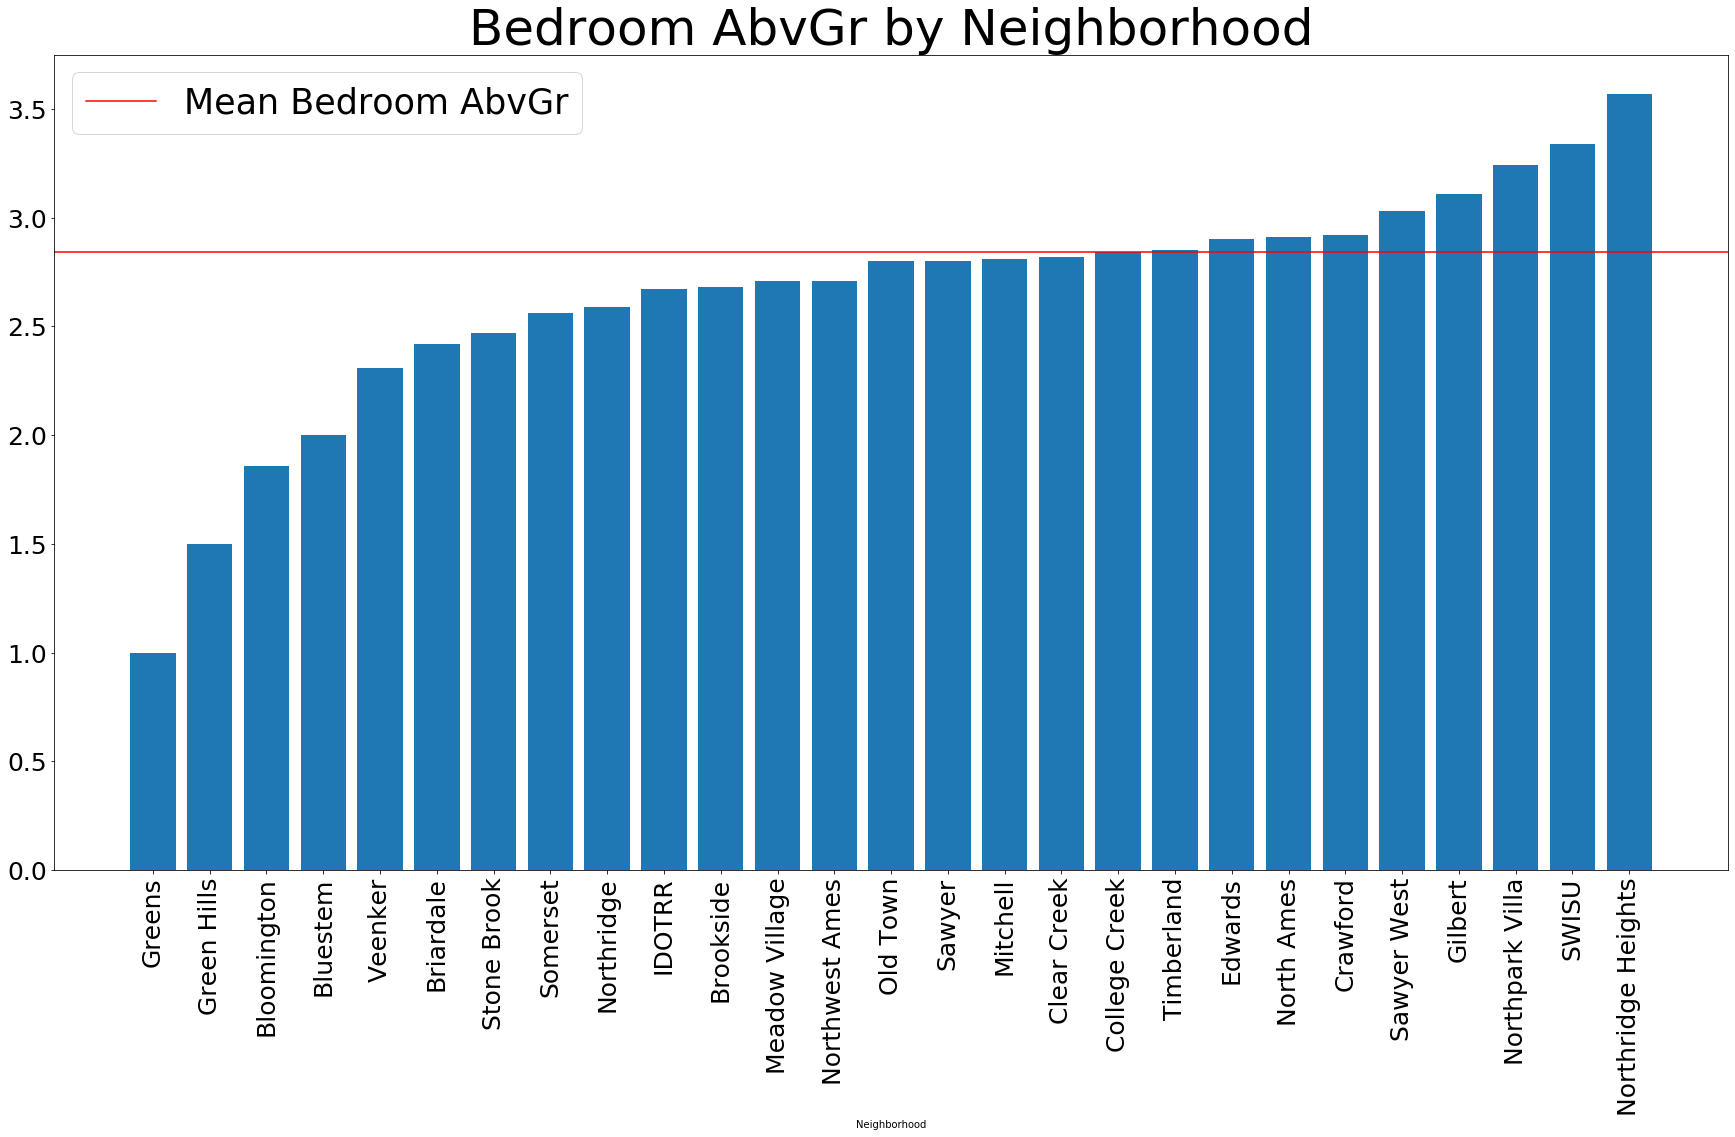

In [25]:
chart_mean(neighborhood_glance, train_eda, neighborhood_names, 'Bedroom AbvGr', 'Bedrooms')

In [26]:
neighborhood_glance.head(1)

,SalePrice,Lot Area,Year Built,Overall Qual,Overall Cond,Gr Liv Area,Full Bath,Bedroom AbvGr,Kitchen Qual,TotRms AbvGrd,...,Northridge Heights,Northwest Ames,Old Town,SWISU,Sawyer,Sawyer West,Somerset,Stone Brook,Timberland,Veenker
0,130500,13517,1976,6,8,1479,2,3,4,6,...,0,0,0,0,1,0,0,0,0,0


# Automated Neighborhood Sorting

### Created a function here to create a a new dataframe of neighborhoods, with the columns of Mean Key Feature Score, and Mean Sale Price.

In [27]:
def return_neighborhood(dataframe, categorylist, feature1, feature2, feature3, scale):
    # create new column by making a feature score
    dataframe['Key Features'] = (dataframe[feature1] * dataframe[feature2] *(dataframe[feature3] > 2))/scale
    neighborhood_scores = {}    # create an empty dictionary
    for column in dataframe.columns:    #cycle through the columns in the dataframe
        for key, neighborhood in categorylist.items():   # pull keys and values from neighborhood dictionary 
            if column in categorylist[key]:    # is the column in the values of the dictionary
                # Create mean key feature score and mean sale price for each neighborhood and add to dictionary
                neighborhood_key_features =  neighborhood_glance[(neighborhood_glance[column] == 1)]['Key Features'].mean()
                neighborhood_sale_price = neighborhood_glance[(neighborhood_glance[column]==1)]['SalePrice'].mean()
                neighborhood_scores[column] = (neighborhood_key_features, neighborhood_sale_price)
    # create new dataframe
    neighborhood_score = pd.DataFrame.from_dict(neighborhood_scores, orient='index')
    neighborhood_score.rename(columns={0: 'Key Features', 1: 'SalePrice'}, inplace=True)
    return neighborhood_score.sort_values('Key Features', ascending=False)


### Created a function here to create a chart of the neighborhoods by Key Feature Score.

In [28]:
def chart_feature_score(dataframe1, item):
    plt.figure(figsize=(30,15))
    plt.bar(dataframe1.index, dataframe1[item])
    plt.xticks(rotation=90, fontsize=25)
    plt.yticks(fontsize=25)
    plt.title(f'{item}', fontsize=50)
    plt.xlabel('Neighborhood', fontsize=35)
    plt.ylabel('Key Feature Score', fontsize=35)
    ;


In [29]:
# Create score dataframe for Client 2
client2_featurescore = return_neighborhood(neighborhood_glance, neighborhood_names, 'Gr Liv Area', 'Lot Area', 'Full Bath', 1)
client2_featurescore

/Users/chrisjohnson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Key Features,SalePrice
Stone Brook,7.155211e+06,316613.638889
Clear Creek,2.529117e+06,205328.727273
Northridge Heights,2.155676e+06,314470.595745
Veenker,1.700242e+06,245356.250000
Northwest Ames,1.545779e+06,322831.352459
Northpark Villa,1.525306e+06,194619.022989
Mitchell,1.185654e+06,168121.604938
Crawford,1.157183e+06,205901.211268
Sawyer West,1.092429e+06,187760.160920
Edwards,9.165752e+05,128800.114286


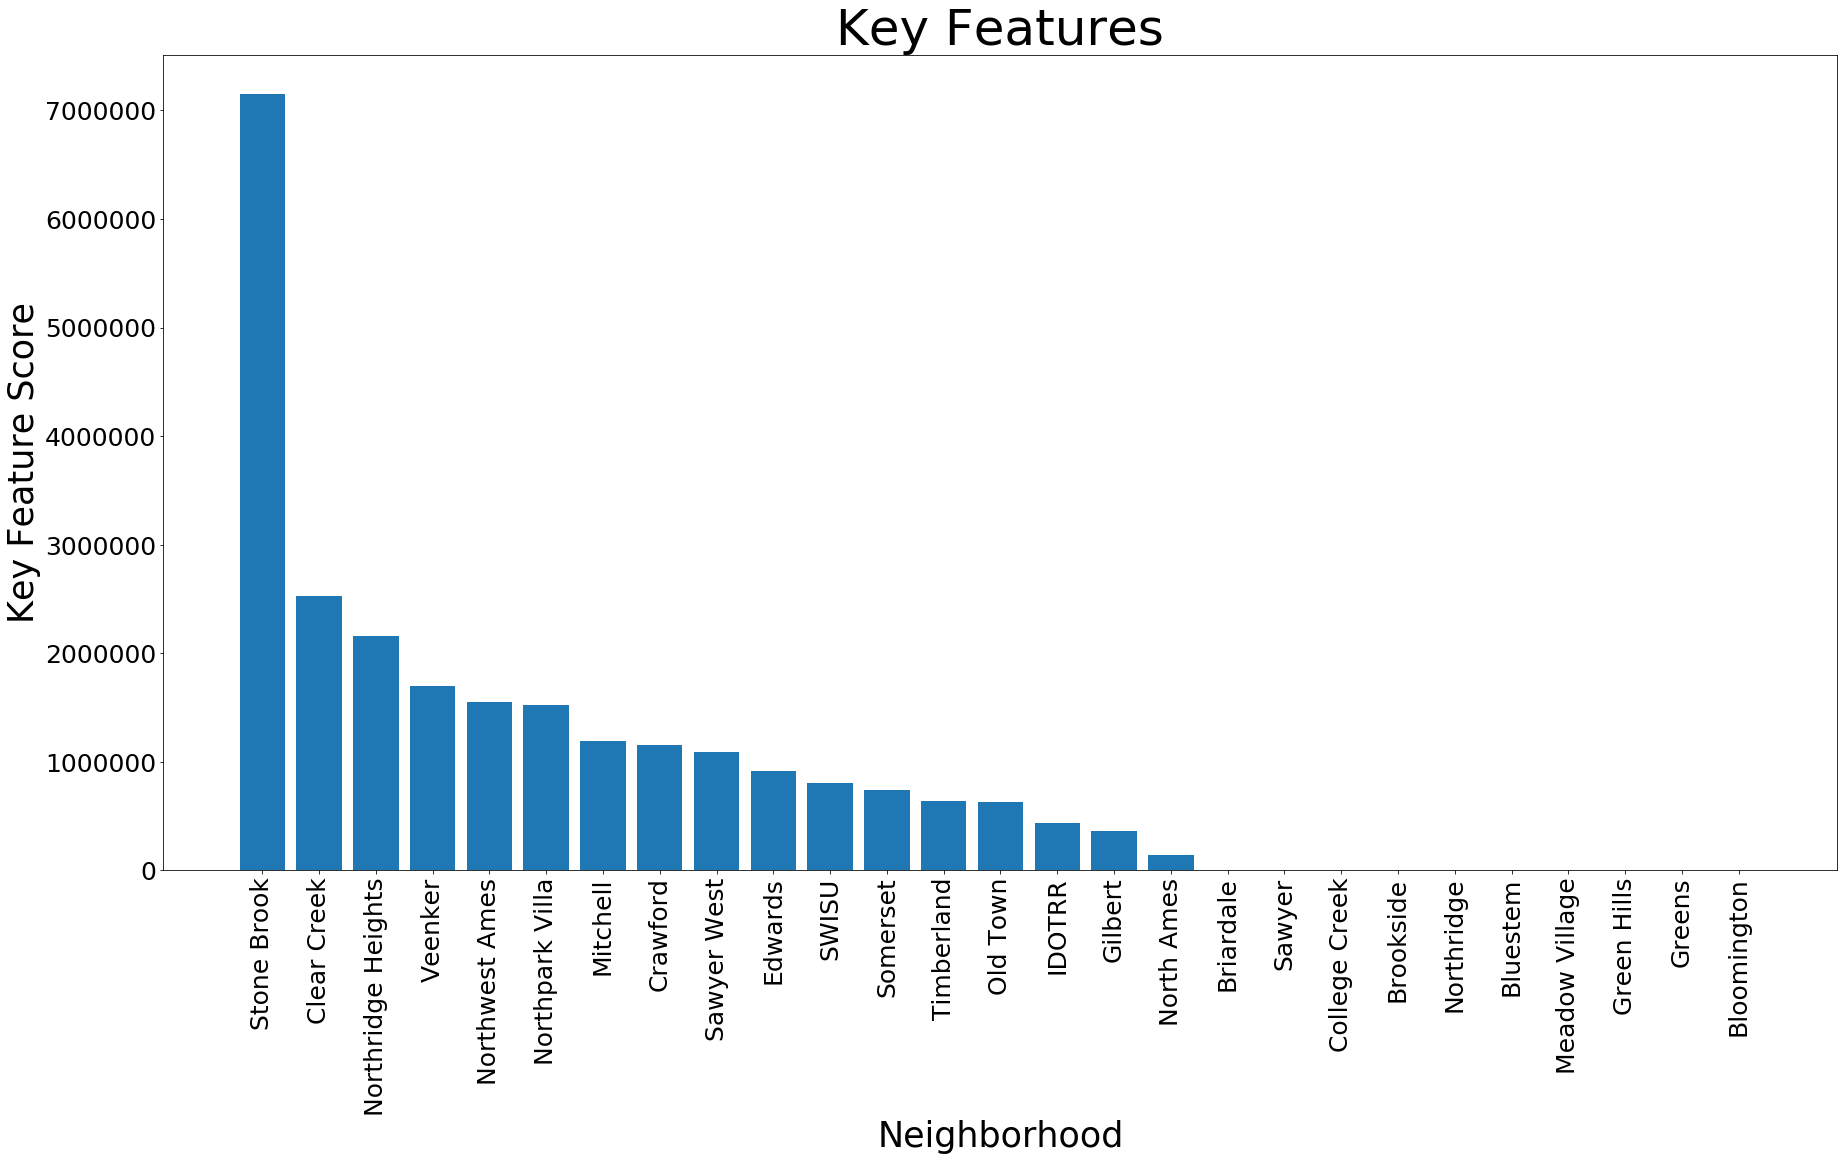

In [30]:
chart_feature_score(client2_featurescore, 'Key Features')

In [31]:
neighborhood_glance.to_csv('../3 Data_Files/neighborhood_glance.csv')